#Análise de faturamento de filiais


Este dataset refere-se a uma empresa com várias lojas de venda de açaí e contém dados detalhados de faturamento. Utilizaremos essas informações para realizar uma análise abrangente da situação atual das filiais e identificar oportunidades de investimento futuro. A análise incluirá projeções de faturamento e fornecerá insights valiosos para apoiar a tomada de decisões estratégicas. O link para acessar a base de dados está disponível a seguir:
https://www.kaggle.com/datasets/adrianosantosdev/faturamento-das-lojas

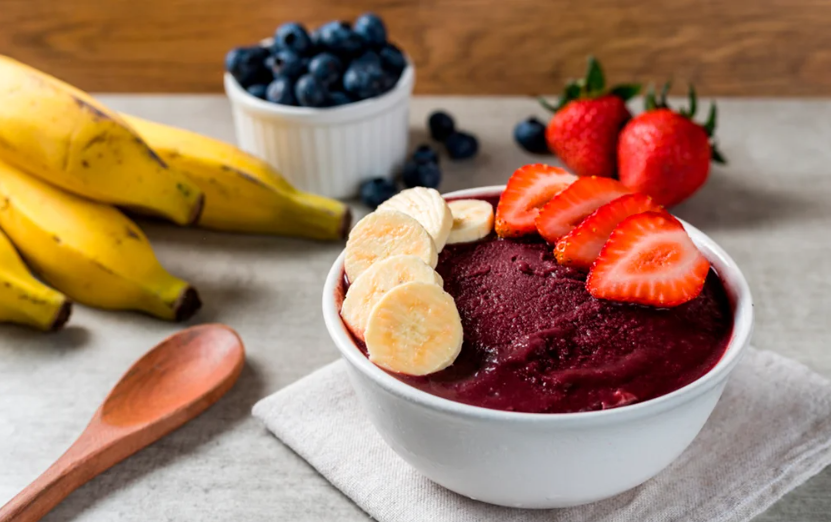

##Importação dos pacotes e da base de dados!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Projetos_para_publicar/Faturamento/vendas.xlsx')

In [ ]:
data.head()

,id_pedido,data,loja,cidade,estado,regiao,tamanho,local_consumo,preco,forma_pagamento,ano_mes
0,PED1994,2020-01-01,Loja 4,Santos,São Paulo,Sudeste,300ml,Consumo no local,5,Dinheiro,2020-01
1,PED2246,2020-01-01,Loja 6,Florianópolis,Santa Catarina,Sul,500ml,Consumo no local,11,Débito,2020-01
2,PED3876,2020-01-01,Loja 3,Rio de Janeiro,Rio de Janeiro,Sudeste,300ml,Delivery,7,Crédito,2020-01
3,PED4352,2020-01-01,Loja 1,Fortaleza,Ceará,Nordeste,1000ml,Consumo no local,7,Débito,2020-01
4,PED8633,2020-01-01,Loja 5,São Paulo,São Paulo,Sudeste,200ml,Delivery,9,Crédito,2020-01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_pedido        70000 non-null  object        
 1   data             70000 non-null  datetime64[ns]
 2   loja             70000 non-null  object        
 3   cidade           70000 non-null  object        
 4   estado           70000 non-null  object        
 5   regiao           70000 non-null  object        
 6   tamanho          70000 non-null  object        
 7   local_consumo    70000 non-null  object        
 8   preco            70000 non-null  int64         
 9   forma_pagamento  70000 non-null  object        
 10  ano_mes          70000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 5.9+ MB


##Ajuste do Dataset

Adicionando novas colunas no Dataset

In [ ]:
data['Ano'] = data.data.dt.year
data['Mes'] = data.data.dt.month
data['Dia'] = data.data.dt.day
data.head()

,id_pedido,data,loja,cidade,estado,regiao,tamanho,local_consumo,preco,forma_pagamento,ano_mes,Ano,Mes,Dia
0,PED1994,2020-01-01,Loja 4,Santos,São Paulo,Sudeste,300ml,Consumo no local,5,Dinheiro,2020-01,2020,1,1
1,PED2246,2020-01-01,Loja 6,Florianópolis,Santa Catarina,Sul,500ml,Consumo no local,11,Débito,2020-01,2020,1,1
2,PED3876,2020-01-01,Loja 3,Rio de Janeiro,Rio de Janeiro,Sudeste,300ml,Delivery,7,Crédito,2020-01,2020,1,1
3,PED4352,2020-01-01,Loja 1,Fortaleza,Ceará,Nordeste,1000ml,Consumo no local,7,Débito,2020-01,2020,1,1
4,PED8633,2020-01-01,Loja 5,São Paulo,São Paulo,Sudeste,200ml,Delivery,9,Crédito,2020-01,2020,1,1


In [ ]:
data['Dia_da_semana'] = pd.to_datetime(data['data'])
data['Dia_da_semana'] = data['Dia_da_semana'].dt.day_name()
data.head()

,id_pedido,data,loja,cidade,estado,regiao,tamanho,local_consumo,preco,forma_pagamento,ano_mes,Ano,Mes,Dia,Dia_da_semana
0,PED1994,2020-01-01,Loja 4,Santos,São Paulo,Sudeste,300ml,Consumo no local,5,Dinheiro,2020-01,2020,1,1,Wednesday
1,PED2246,2020-01-01,Loja 6,Florianópolis,Santa Catarina,Sul,500ml,Consumo no local,11,Débito,2020-01,2020,1,1,Wednesday
2,PED3876,2020-01-01,Loja 3,Rio de Janeiro,Rio de Janeiro,Sudeste,300ml,Delivery,7,Crédito,2020-01,2020,1,1,Wednesday
3,PED4352,2020-01-01,Loja 1,Fortaleza,Ceará,Nordeste,1000ml,Consumo no local,7,Débito,2020-01,2020,1,1,Wednesday
4,PED8633,2020-01-01,Loja 5,São Paulo,São Paulo,Sudeste,200ml,Delivery,9,Crédito,2020-01,2020,1,1,Wednesday


In [ ]:
def dia_portugues(data):
    dias_da_semana = {
        'Monday': 'Segunda-feira',
        'Tuesday': 'Terça-feira',
        'Wednesday': 'Quarta-feira',
        'Thursday': 'Quinta-feira',
        'Friday': 'Sexta-feira',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    }

    dia_em_ingles = data.day_name()
    return dias_da_semana[dia_em_ingles]

data['Dia_da_semana'] = data['data'].apply(dia_portugues)
data.head()


,id_pedido,data,loja,cidade,estado,regiao,tamanho,local_consumo,preco,forma_pagamento,ano_mes,Ano,Mes,Dia,Dia_da_semana
0,PED1994,2020-01-01,Loja 4,Santos,São Paulo,Sudeste,300ml,Consumo no local,5,Dinheiro,2020-01,2020,1,1,Quarta-feira
1,PED2246,2020-01-01,Loja 6,Florianópolis,Santa Catarina,Sul,500ml,Consumo no local,11,Débito,2020-01,2020,1,1,Quarta-feira
2,PED3876,2020-01-01,Loja 3,Rio de Janeiro,Rio de Janeiro,Sudeste,300ml,Delivery,7,Crédito,2020-01,2020,1,1,Quarta-feira
3,PED4352,2020-01-01,Loja 1,Fortaleza,Ceará,Nordeste,1000ml,Consumo no local,7,Débito,2020-01,2020,1,1,Quarta-feira
4,PED8633,2020-01-01,Loja 5,São Paulo,São Paulo,Sudeste,200ml,Delivery,9,Crédito,2020-01,2020,1,1,Quarta-feira


In [ ]:
data.head()

,id_pedido,data,loja,cidade,estado,regiao,tamanho,local_consumo,preco,forma_pagamento,ano_mes,Ano,Mes,Dia,Dia_da_semana
0,PED1994,2020-01-01,Loja 4,Santos,São Paulo,Sudeste,300ml,Consumo no local,5,Dinheiro,2020-01,2020,1,1,Quarta-feira
1,PED2246,2020-01-01,Loja 6,Florianópolis,Santa Catarina,Sul,500ml,Consumo no local,11,Débito,2020-01,2020,1,1,Quarta-feira
2,PED3876,2020-01-01,Loja 3,Rio de Janeiro,Rio de Janeiro,Sudeste,300ml,Delivery,7,Crédito,2020-01,2020,1,1,Quarta-feira
3,PED4352,2020-01-01,Loja 1,Fortaleza,Ceará,Nordeste,1000ml,Consumo no local,7,Débito,2020-01,2020,1,1,Quarta-feira
4,PED8633,2020-01-01,Loja 5,São Paulo,São Paulo,Sudeste,200ml,Delivery,9,Crédito,2020-01,2020,1,1,Quarta-feira


#Análise exploratória

##Análise geral dos dados

In [ ]:
new_data = data.groupby('ano_mes').agg({'preco': 'sum'}).reset_index()
new_data.head()

,ano_mes,preco
0,2020-01,11859
1,2020-02,11229
2,2020-03,13515
3,2020-04,11330
4,2020-05,12254


In [ ]:
ano_data = data.groupby('Ano').agg({'preco': 'sum'}).reset_index()
ano_data.head()

,Ano,preco
0,2020,146069
1,2021,145217
2,2022,293578


Criação de uma função para verificação do crescimento anual

In [ ]:
def calc_cres(df, coluna):
    df['Crescimento_anual'] = (df[coluna].pct_change() * 100).round(2)
    return df

df_cresc = calc_cres(ano_data, 'preco')
df_cresc

,Ano,preco,Crescimento_anual
0,2020,146069,NaN
1,2021,145217,-0.58
2,2022,293578,102.17


Criação de um Dataset verificação de informações gerais das filiais.

In [ ]:
df_cresc = df_cresc.rename(columns={'preco':'Faturamento_Total'})
df_cresc['Contagem_anual_total'] = data.groupby('Ano').agg({'preco':'count'}).reset_index()['preco']
df_cresc['Unidades_vendidas_por_dia'] = (df_cresc.Contagem_anual_total / 365).round(2)
df_cresc["Média_vendas_por_dia"] = (df_cresc.Faturamento_Total / 365).round(2)
df_cresc

,Ano,Faturamento_Total,Crescimento_anual,Contagem_anual_total,Unidades_vendidas_por_dia,Média_vendas_por_dia
0,2020,146069,NaN,17477,47.88,400.19
1,2021,145217,-0.58,17395,47.66,397.85
2,2022,293578,102.17,35128,96.24,804.32


In [ ]:
ano_cidade = data.groupby(['Ano',"cidade"]).agg({'preco': 'sum'}).reset_index()
ano_cidade.head()

,Ano,cidade,preco
0,2020,Florianópolis,16225
1,2020,Fortaleza,26280
2,2020,Niterói,16936
3,2020,Rio de Janeiro,24583
4,2020,Santos,36772


Boxplot de faturamento mensal por filial

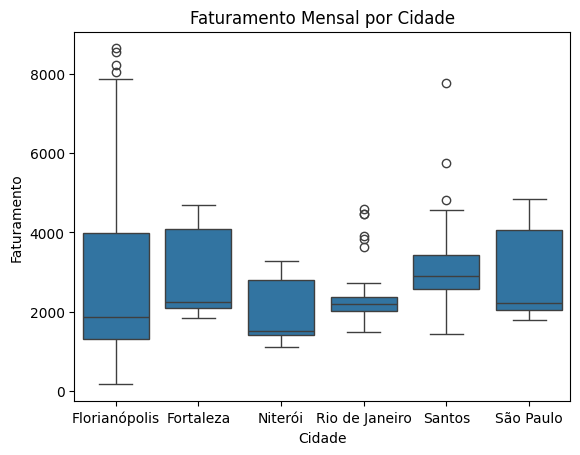

In [ ]:
cidade = data.groupby(['ano_mes','cidade']).agg({'preco': 'sum'}).reset_index()
sns.boxplot( data=cidade, x='cidade', y='preco')
plt.title('Faturamento Mensal por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Faturamento')
plt.show()

Boxplot de faturamento de consumo no local e delivery mensal.

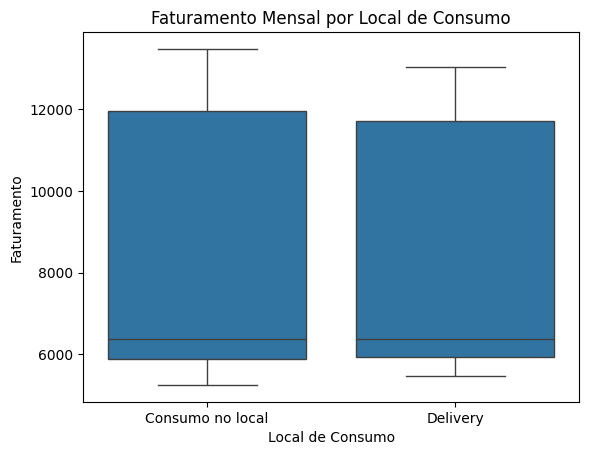

In [ ]:
local_consumo = data.groupby(['ano_mes','local_consumo']).agg({'preco': 'sum'}).reset_index()
sns.boxplot( data=local_consumo, x='local_consumo', y='preco')
plt.title('Faturamento Mensal por Local de Consumo')
plt.xlabel('Local de Consumo')
plt.ylabel('Faturamento')
plt.show()

# Série temporal de vendas por mês.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=new_data["ano_mes"], y=new_data["preco"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos de 2020 e 2022',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,  # Tamanho da fonte
            'family': 'Calibri',  # Família da fonte
            'color': 'black'  # Cor do título
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',  # Cor das linhas de grade do eixo X
        gridwidth=1  # Largura das linhas de grade do eixo X
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',  # Cor das linhas de grade do eixo Y
        gridwidth=1  # Largura das linhas de grade do eixo Y
    ))
fig.show()

In [ ]:
local_consumo = data.groupby(['Ano','local_consumo']).agg({'preco': 'sum'}).reset_index()
local_consumo = local_consumo.rename(columns={'preco':'Faturamento_Total'})
local_consumo

,Ano,local_consumo,Faturamento_Total
0,2020,Consumo no local,73015
1,2020,Delivery,73054
2,2021,Consumo no local,72621
3,2021,Delivery,72596
4,2022,Consumo no local,148135
5,2022,Delivery,145443


In [ ]:
ano_local_consumo = data.groupby(['ano_mes',"local_consumo"]).agg({'preco': 'sum'}).reset_index()
ano_local_consumo.head()

,ano_mes,local_consumo,preco
0,2020-01,Consumo no local,5870
1,2020-01,Delivery,5989
2,2020-02,Consumo no local,5749
3,2020-02,Delivery,5480
4,2020-03,Consumo no local,6803


### Faturamento mensal seguimentado por modo de consumo

In [ ]:
fig = px.line(ano_local_consumo, x='ano_mes', y='preco', color='local_consumo', markers=True)
              #title='Gráfico de Linha de Preço por Local de Consumo',
              #labels={'ano_mes': 'Ano e Mês', 'preco': 'Preço', 'local_consumo': 'Local de Consumo'})
fig.update_layout(title={
    'text' : 'Faturamento mensal de delivery e consumo no local',
    'y': 0.93,
    'x': 0.5,
    'font': {
            'size': 22,  # Tamanho da fonte
            'family': 'Calibri',  # Família da fonte
            'color': 'black'  # Cor do título
        }},
                  xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',  # Cor das linhas de grade do eixo X
        gridwidth=1  # Largura das linhas de grade do eixo X
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',  # Cor das linhas de grade do eixo Y
        gridwidth=1  # Largura das linhas de grade do eixo Y
    ))

fig.show()

### Faturamento total por forma de pagmento

In [ ]:
val = pd.DataFrame(data['forma_pagamento'].value_counts()).reset_index()
fig = px.bar(val, x='forma_pagamento', y='count',)
fig.update_layout(title={
    'text' : 'Faturamento total por forma de pagamento',
    'y': 0.94,
    'x': 0.5,
    'font': {
            'size': 22,  # Tamanho da fonte
            'family': 'Calibri',  # Família da fonte
            'color': 'black'  # Cor do título
        }},
    xaxis_title='Mode de pagamento',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',  # Cor das linhas de grade do eixo X
        gridwidth=1  # Largura das linhas de grade do eixo X
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',  # Cor das linhas de grade do eixo Y
        gridwidth=1  # Largura das linhas de grade do eixo Y
    ))

fig.update_traces(
    marker_line=dict(
        color='black',  # Cor da borda
        width=0.4         # Largura da borda
    ),
    width=0.6  # Ajusta a largura das barras
)
fig.show()

In [ ]:
dia_semana = data.groupby("Dia_da_semana").agg({'preco': 'sum'}).reset_index()
dia_semana.head()

,Dia_da_semana,preco
0,Domingo,82469
1,Quarta-feira,84566
2,Quinta-feira,82567
3,Segunda-feira,83235
4,Sexta-feira,84640


Faturamento por dia da semana.

In [ ]:
fig = px.bar(dia_semana, x='Dia_da_semana', y='preco')
fig.update_layout(title={
    'text' : 'Faturamento total por dia da semana.',
    'y': 0.94,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Dia da semana',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))

fig.update_traces(
    marker_line=dict(
        color='black',
        width=0.4
    ),
    width=0.6
)
fig.show()

##Análise por cidade

Datasets seguimentados por cidade, com seus respectivos faturamentos anuais e mensais.

In [ ]:
ano_sc = ano_cidade['cidade'] == 'Florianópolis'
ano_sc = ano_cidade[ano_sc]
########################################################
ano_sp = ano_cidade['cidade'] == 'São Paulo'
ano_sp = ano_cidade[ano_sp]
########################################################
ano_sa = ano_cidade['cidade'] == "Santos"
ano_sa = ano_cidade[ano_sa]
########################################################
ano_ni = ano_cidade['cidade'] == 'Niterói'
ano_ni = ano_cidade[ano_ni]
########################################################
ano_rj = ano_cidade['cidade'] == 'Rio de Janeiro'
ano_rj = ano_cidade[ano_rj]
########################################################
ano_fo = ano_cidade['cidade'] == 'Fortaleza'
ano_fo = ano_cidade[ano_fo]
########################################################
ano_fo

,Ano,cidade,preco
1,2020,Fortaleza,26280
7,2021,Fortaleza,25060
13,2022,Fortaleza,51822


In [ ]:
n_data = data.groupby(['ano_mes',"cidade"]).agg({'preco': 'sum'}).reset_index()
n_data.head()

,ano_mes,cidade,preco
0,2020-01,Florianópolis,1608
1,2020-01,Fortaleza,2155
2,2020-01,Niterói,1202
3,2020-01,Rio de Janeiro,2084
4,2020-01,Santos,2584


In [ ]:
sc = n_data['cidade'] == 'Florianópolis'
sc = n_data[sc]
########################################################
sp = n_data['cidade'] == 'São Paulo'
sp = n_data[sp]
########################################################
sa = n_data['cidade'] == "Santos"
sa = n_data[sa]
########################################################
ni = n_data['cidade'] == 'Niterói'
ni = n_data[ni]
########################################################
rj = n_data['cidade'] == 'Rio de Janeiro'
rj = n_data[rj]
########################################################
fo = n_data['cidade'] == 'Fortaleza'
fo = n_data[fo]
########################################################

##Análise de Florianópolis

In [ ]:
sc = sc.groupby(['ano_mes',"cidade"]).agg({'preco': 'sum'}).reset_index()
sc.head(10)

,ano_mes,cidade,preco
0,2020-01,Florianópolis,1608
1,2020-02,Florianópolis,963
2,2020-03,Florianópolis,1679
3,2020-04,Florianópolis,1186
4,2020-05,Florianópolis,1160
5,2020-06,Florianópolis,1317
6,2020-07,Florianópolis,2215
7,2020-08,Florianópolis,1800
8,2020-09,Florianópolis,1423
9,2020-10,Florianópolis,1104


Crescimento anual.

In [ ]:
info_sc = calc_cres(ano_sc, 'preco')
info_sc

,Ano,cidade,preco,Crescimento_anual
0,2020,Florianópolis,16225,NaN
6,2021,Florianópolis,22033,35.80
12,2022,Florianópolis,70927,221.91


Criando um novo dataset para alguns insigths

In [ ]:
data_sc = data["cidade"] == "Florianópolis"
data_sc = data[data_sc]
data_sc.head()
info_sc = info_sc.rename(columns={'preco':'Faturamento_Total'})
info_sc = info_sc.reset_index()
info_sc = info_sc.drop(columns=['index'])
info_sc['Contagem_anual'] = data_sc.groupby('Ano').agg({'preco':'count'}).reset_index()['preco']
info_sc['Media_unidades_vendidas_por_dia'] = (info_sc.Contagem_anual / 365).round(2)
info_sc['Media_vendas_por_dia'] = (info_sc.Faturamento_Total / 365).round(2)
info_sc

,Ano,cidade,Faturamento_Total,Crescimento_anual,Contagem_anual,Media_unidades_vendidas_por_dia,Media_vendas_por_dia
0,2020,Florianópolis,16225,NaN,1939,5.31,44.45
1,2021,Florianópolis,22033,35.80,2645,7.25,60.36
2,2022,Florianópolis,70927,221.91,8491,23.26,194.32


In [ ]:
fig = go.Figure(data=go.Scatter(x=sc["ano_mes"], y=sc["preco"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos de 2020 e 2022 da filial de Florianópolis',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

##Análise de de São Paulo

In [ ]:
sp = sp.groupby(['ano_mes',"cidade"]).agg({'preco': 'sum'}).reset_index()
sp.head(3)

,ano_mes,cidade,preco
0,2020-01,São Paulo,2226
1,2020-02,São Paulo,1974
2,2020-03,São Paulo,2424


In [ ]:
info_sp = calc_cres(ano_sp, 'preco')
info_sp

,Ano,cidade,preco,Crescimento_anual
5,2020,São Paulo,25273,NaN
11,2021,São Paulo,25584,1.23
17,2022,São Paulo,51332,100.64


In [ ]:
data_sp = data["cidade"] == "São Paulo"
data_sp = data[data_sp]
data_sp.head()
info_sp = info_sp.rename(columns={'preco':'Faturamento_Total'})
info_sp = info_sp.reset_index()
info_sp = info_sp.drop(columns=['index'])
info_sp['Contagem_anual'] = data_sp.groupby('Ano').agg({'preco':'count'}).reset_index()['preco']
info_sp['Media_unidades_vendidas_por_dia'] = (info_sp.Contagem_anual / 365).round(2)
info_sp['Media_vendas_por_dia'] = (info_sp.Faturamento_Total / 365).round(2)
info_sp

,Ano,cidade,Faturamento_Total,Crescimento_anual,Contagem_anual,Media_unidades_vendidas_por_dia,Media_vendas_por_dia
0,2020,São Paulo,25273,NaN,3003,8.23,69.24
1,2021,São Paulo,25584,1.23,3068,8.41,70.09
2,2022,São Paulo,51332,100.64,6106,16.73,140.64


In [ ]:
fig = go.Figure(data=go.Scatter(x=sp["ano_mes"], y=sp["preco"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos de 2020 e 2022 da filial de São Paulo',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

##Análise de Santos

In [ ]:
sa = sa.groupby(['ano_mes',"cidade"]).agg({'preco': 'sum'}).reset_index()
sa.head(3)

,ano_mes,cidade,preco
0,2020-01,Santos,2584
1,2020-02,Santos,3125
2,2020-03,Santos,3096


In [ ]:
info_sa = calc_cres(ano_sa, 'preco')
info_sa

,Ano,cidade,preco,Crescimento_anual
4,2020,Santos,36772,NaN
10,2021,Santos,29367,-20.14
16,2022,Santos,46240,57.46


In [ ]:
data_sa = data["cidade"] == "Santos"
data_sa = data[data_sa]
data_sa.head()
info_sa = info_sa.rename(columns={'preco':'Faturamento_Total'})
info_sa = info_sa.reset_index()
info_sa = info_sa.drop(columns=['index'])
info_sa['Contagem_anual'] = data_sa.groupby('Ano').agg({'preco':'count'}).reset_index()['preco']
info_sa['Media_unidades_vendidas_por_dia'] = (info_sa.Contagem_anual / 365).round(2)
info_sa['Media_vendas_por_dia'] = (info_sa.Faturamento_Total / 365).round(2)
info_sa

,Ano,cidade,Faturamento_Total,Crescimento_anual,Contagem_anual,Media_unidades_vendidas_por_dia,Media_vendas_por_dia
0,2020,Santos,36772,NaN,4440,12.16,100.75
1,2021,Santos,29367,-20.14,3515,9.63,80.46
2,2022,Santos,46240,57.46,5528,15.15,126.68


In [ ]:
fig = go.Figure(data=go.Scatter(x=sa["ano_mes"], y=sa["preco"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos de 2020 e 2022 da filial de Santos',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

##Análise Niterói

In [ ]:
ni = ni.groupby(['ano_mes',"cidade"]).agg({'preco': 'sum'}).reset_index()
ni.head(3)

,ano_mes,cidade,preco
0,2020-01,Niterói,1202
1,2020-02,Niterói,1206
2,2020-03,Niterói,1841


In [ ]:
info_ni = calc_cres(ano_ni, 'preco')
info_ni

,Ano,cidade,preco,Crescimento_anual
2,2020,Niterói,16936,NaN
8,2021,Niterói,17685,4.42
14,2022,Niterói,34971,97.74


In [ ]:
data_ni = data["cidade"] == "Niterói"
data_ni = data[data_ni]
data_ni.head()
info_ni = info_ni.rename(columns={'preco':'Faturamento_Total'})
info_ni = info_ni.reset_index()
info_ni = info_ni.drop(columns=['index'])
info_ni['Contagem_anual'] = data_ni.groupby('Ano').agg({'preco':'count'}).reset_index()['preco']
info_ni['Media_unidades_vendidas_por_dia'] = (info_ni.Contagem_anual / 365).round(2)
info_ni['Media_vendas_por_dia'] = (info_ni.Faturamento_Total / 365).round(2)
info_ni

,Ano,cidade,Faturamento_Total,Crescimento_anual,Contagem_anual,Media_unidades_vendidas_por_dia,Media_vendas_por_dia
0,2020,Niterói,16936,NaN,2018,5.53,46.40
1,2021,Niterói,17685,4.42,2113,5.79,48.45
2,2022,Niterói,34971,97.74,4187,11.47,95.81


In [ ]:
fig = go.Figure(data=go.Scatter(x=ni["ano_mes"], y=ni["preco"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos de 2020 e 2022 da filial de Santos',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

##Análise Rio de Janeiro

In [ ]:
rj = rj.groupby(['ano_mes',"cidade"]).agg({'preco': 'sum'}).reset_index()
rj.head(3)

,ano_mes,cidade,preco
0,2020-01,Rio de Janeiro,2084
1,2020-02,Rio de Janeiro,2016
2,2020-03,Rio de Janeiro,2177


In [ ]:
info_rj = calc_cres(ano_rj, 'preco')
info_rj

,Ano,cidade,preco,Crescimento_anual
3,2020,Rio de Janeiro,24583,NaN
9,2021,Rio de Janeiro,25488,3.68
15,2022,Rio de Janeiro,38286,50.21


In [ ]:
data_rj = data["cidade"] == "Rio de Janeiro"
data_rj = data[data_rj]
data_rj.head()
info_rj = info_rj.rename(columns={'preco':'Faturamento_Total'})
info_rj = info_rj.reset_index()
info_rj = info_rj.drop(columns=['index'])
info_rj['Contagem_anual'] = data_rj.groupby('Ano').agg({'preco':'count'}).reset_index()['preco']
info_rj['Media_unidades_vendidas_por_dia'] = (info_rj.Contagem_anual / 365).round(2)
info_rj['Media_vendas_por_dia'] = (info_rj.Faturamento_Total / 365).round(2)
info_rj

,Ano,cidade,Faturamento_Total,Crescimento_anual,Contagem_anual,Media_unidades_vendidas_por_dia,Media_vendas_por_dia
0,2020,Rio de Janeiro,24583,NaN,2933,8.04,67.35
1,2021,Rio de Janeiro,25488,3.68,3032,8.31,69.83
2,2022,Rio de Janeiro,38286,50.21,4638,12.71,104.89


In [ ]:
fig = go.Figure(data=go.Scatter(x=rj["ano_mes"], y=rj["preco"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos de 2020 e 2022 da filial do Rio de Janeiro',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))

fig.show()

##Análise de Fortaleza

In [ ]:
fo = fo.groupby(['ano_mes',"cidade"]).agg({'preco': 'sum'}).reset_index()
fo.head(3)

,ano_mes,cidade,preco
0,2020-01,Fortaleza,2155
1,2020-02,Fortaleza,1945
2,2020-03,Fortaleza,2298


In [ ]:
info_fo = calc_cres(ano_fo, 'preco')
info_fo

,Ano,cidade,preco,Crescimento_anual
1,2020,Fortaleza,26280,NaN
7,2021,Fortaleza,25060,-4.64
13,2022,Fortaleza,51822,106.79


In [ ]:
data_fo = data["cidade"] == "Fortaleza"
data_fo = data[data_fo]
data_fo.head()
info_fo = info_fo.rename(columns={'preco':'Faturamento_Total'})
info_fo = info_fo.reset_index()
info_fo = info_fo.drop(columns=['index'])
info_fo['Contagem_anual'] = data_fo.groupby('Ano').agg({'preco':'count'}).reset_index()['preco']
info_fo['Media_unidades_vendidas_por_dia'] = (info_fo.Contagem_anual / 365).round(2)
info_fo['Media_vendas_por_dia'] = (info_fo.Faturamento_Total / 365).round(2)
info_fo

,Ano,cidade,Faturamento_Total,Crescimento_anual,Contagem_anual,Media_unidades_vendidas_por_dia,Media_vendas_por_dia
0,2020,Fortaleza,26280,NaN,3144,8.61,72.00
1,2021,Fortaleza,25060,-4.64,3022,8.28,68.66
2,2022,Fortaleza,51822,106.79,6178,16.93,141.98


In [ ]:
fig = go.Figure(data=go.Scatter(x=fo["ano_mes"], y=fo["preco"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos 2020 e 2022 da filial de Fortaleza',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

#Previsão por cidade!

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

##Previsão da filial de Florianópolis

In [ ]:
florianopolis = data[ data.cidade == 'Florianópolis' ].groupby( by=['Ano', 'Mes'] ).agg(Faturamento =('preco', 'sum') ).reset_index()

florianopolis['Data'] = pd.to_datetime( florianopolis['Ano'].astype('str') + '-' + florianopolis['Mes'].astype('str') + '-1' )

florianopolis.drop( columns=['Ano', 'Mes'], inplace=True )

florianopolis.set_index( 'Data', inplace=True )

florianopolis.head()

,Faturamento
Data,
2020-01-01,1608
2020-02-01,963
2020-03-01,1679
2020-04-01,1186
2020-05-01,1160


In [ ]:
fig = go.Figure(data=go.Scatter(x=florianopolis.index, y=florianopolis["Faturamento"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos 2020 e 2022 da filial de Florianópolis',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
train = florianopolis.loc["2020-01-01":"2022-06-01"]
test = florianopolis.loc["2022-07-01":]

In [ ]:
train.head(4)

,Faturamento
Data,
2020-01-01,1608
2020-02-01,963
2020-03-01,1679
2020-04-01,1186


In [ ]:
model = auto_arima(train,seasonal=True,m=6)

In [ ]:
previsao = model.predict(6)
previsao

,0
2022-07-01,4740.831713
2022-08-01,4862.084744
2022-09-01,4983.337774
2022-10-01,5104.590805
2022-11-01,5225.843835
2022-12-01,5347.096866


In [ ]:
previsao = pd.DataFrame(previsao)
previsao.columns = ['0']
previsao.index = test.index
previsao.head()
previsao.columns

Index(['0'], dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

MAE = mean_absolute_error( test, previsao )
MSE = mean_squared_error( test, previsao)
RMSE = mean_squared_error( test, previsao, squared=False )
MAPE = (mean_absolute_percentage_error(test,previsao))*100

Dicionario = {
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round((MAPE), 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
MAE,3053.20
MSE,9641865.58
RMSE,3105.14
MAPE,37.45


In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=train.index, y=train['Faturamento'], mode='lines+markers', name='Train', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=test.index, y=test['Faturamento'], mode='lines+markers', name='Test', line=dict(color='green'))
)

fig.add_trace(
    go.Scatter(x= previsao.index, y=previsao['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de Florianópolis',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

### Ajustando modelo

In [ ]:
model_2 = auto_arima(florianopolis, seasonal=True, m=12)

model_2.fit(florianopolis)

previsoes_2 = model_2.predict( 12 )

previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=florianopolis.index, y=florianopolis['Faturamento'], mode='lines+markers', name='Faturamento real', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x= previsoes_2.index, y=previsoes_2['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de Florianópolis',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']
previsoes_2 = previsoes_2.reset_index()
previsoes_2 = previsoes_2.rename(columns={'index':'Data'})
previsoes_2 = previsoes_2.rename(columns={'0':'Faturamento'})
previsoes_2 = previsoes_2.set_index('Data', drop=True)
previsoes_2.head()

,Faturamento
Data,
2023-01-01,8312.499196
2023-02-01,8504.796344
2023-03-01,8697.093492
2023-04-01,8889.390640
2023-05-01,9081.687788


In [ ]:
Data_previsao = pd.concat([florianopolis, previsoes_2], axis=0, ignore_index=False)
data_previsao = Data_previsao.reset_index()
data_previsao.head()

,Data,Faturamento
0,2020-01-01,1608.0
1,2020-02-01,963.0
2,2020-03-01,1679.0
3,2020-04-01,1186.0
4,2020-05-01,1160.0


In [ ]:
data_previsao['Ano'] = data_previsao.Data.dt.year
data_y = (data_previsao.groupby('Ano').agg({'Faturamento':'sum'}).reset_index()).round(2)
data_y.head()

,Ano,Faturamento
0,2020,16225.0
1,2021,22033.0
2,2022,70927.0
3,2023,112441.6


In [ ]:
calc_cres(data_y, 'Faturamento')

,Ano,Faturamento,Crescimento_anual
0,2020,16225.0,NaN
1,2021,22033.0,35.80
2,2022,70927.0,221.91
3,2023,112441.6,58.53


##Previsão da filial de São Paulo

In [ ]:
sao_paulo = data[ data.cidade == 'São Paulo' ].groupby( by=['Ano', 'Mes'] ).agg(Faturamento =('preco', 'sum') ).reset_index()

sao_paulo['Data'] = pd.to_datetime( sao_paulo['Ano'].astype('str') + '-' + sao_paulo['Mes'].astype('str') + '-1' )

sao_paulo.drop( columns=['Ano', 'Mes'], inplace=True )

sao_paulo.set_index( 'Data', inplace=True )

sao_paulo.head()

,Faturamento
Data,
2020-01-01,2226
2020-02-01,1974
2020-03-01,2424
2020-04-01,2051
2020-05-01,2144


In [ ]:
fig = go.Figure(data=go.Scatter(x=sao_paulo.index, y=sao_paulo["Faturamento"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos 2020 e 2022 da filial de São Paulo',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
train = sao_paulo.loc["2020-01-01":"2022-06-01"]
test = sao_paulo.loc["2022-07-01":]

In [ ]:
model = auto_arima(train,seasonal=True,m=6)

In [ ]:
previsao = model.predict(6)
previsao

,0
2022-07-01,6170.161266
2022-08-01,5791.160760
2022-09-01,6388.004655
2022-10-01,5803.777152
2022-11-01,6308.756166
2022-12-01,6220.961850


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

MAE = mean_absolute_error( test, previsao )
MSE = mean_squared_error( test, previsao)
RMSE = mean_squared_error( test, previsao, squared=False )
MAPE = (mean_absolute_percentage_error(test,previsao))*100

Dicionario = {
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round((MAPE), 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
MAE,1843.64
MSE,3488867.56
RMSE,1867.85
MAPE,43.43


In [ ]:
previsao = pd.DataFrame(previsao)
previsao.columns = ['0']
previsao.index = test.index
previsao.head()
previsao.columns

Index(['0'], dtype='object')

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=train.index, y=train['Faturamento'], mode='lines+markers', name='Train', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=test.index, y=test['Faturamento'], mode='lines+markers', name='Test', line=dict(color='green'))
)

fig.add_trace(
    go.Scatter(x= previsao.index, y=previsao['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)


fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de São Paulo',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
model_2 = auto_arima(sao_paulo, seasonal=True, m=12)


model_2.fit(sao_paulo)


previsoes_2 = model_2.predict( 12 )

previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=sao_paulo.index, y=sao_paulo['Faturamento'], mode='lines+markers', name='Faturamento real', line=dict(color='blue'))
)


fig.add_trace(
    go.Scatter(x= previsoes_2.index, y=previsoes_2['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)


fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de São Paulo',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']
previsoes_2 = previsoes_2.reset_index()
previsoes_2 = previsoes_2.rename(columns={'index':'Data'})
previsoes_2 = previsoes_2.rename(columns={'0':'Faturamento'})
previsoes_2 = previsoes_2.set_index('Data', drop=True)
previsoes_2.head()

,Faturamento
Data,
2023-01-01,4705.143091
2023-02-01,4502.188706
2023-03-01,4934.458134
2023-04-01,4559.685997
2023-05-01,4716.219861


In [ ]:
Data_previsao = pd.concat([sao_paulo, previsoes_2], axis=0, ignore_index=False)
data_previsao = Data_previsao.reset_index()
data_previsao.head()

,Data,Faturamento
0,2020-01-01,2226.0
1,2020-02-01,1974.0
2,2020-03-01,2424.0
3,2020-04-01,2051.0
4,2020-05-01,2144.0


In [ ]:
data_previsao['Ano'] = data_previsao.Data.dt.year
data_y = (data_previsao.groupby('Ano').agg({'Faturamento':'sum'}).reset_index()).round(2)
data_y.head()

,Ano,Faturamento
0,2020,25273.00
1,2021,25584.00
2,2022,51332.00
3,2023,55574.09


In [ ]:
calc_cres(data_y, 'Faturamento')

,Ano,Faturamento,Crescimento_anual
0,2020,25273.00,NaN
1,2021,25584.00,1.23
2,2022,51332.00,100.64
3,2023,55574.09,8.26


##Previsão da filial de Santos

In [ ]:
santos = data[ data.cidade == 'Santos' ].groupby( by=['Ano', 'Mes'] ).agg(Faturamento =('preco', 'sum') ).reset_index()

santos['Data'] = pd.to_datetime( santos['Ano'].astype('str') + '-' + santos['Mes'].astype('str') + '-1' )

santos.drop( columns=['Ano', 'Mes'], inplace=True )

santos.set_index( 'Data', inplace=True )

santos.head()

,Faturamento
Data,
2020-01-01,2584
2020-02-01,3125
2020-03-01,3096
2020-04-01,3062
2020-05-01,3099


In [ ]:
fig = go.Figure(data=go.Scatter(x=santos.index, y=santos["Faturamento"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos 2020 e 2022 da filial de Santos',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
train = santos.loc["2020-01-01":"2022-06-01"]
test = santos.loc["2022-07-01":]

In [ ]:
model = auto_arima(train,seasonal=True,m=6)

In [ ]:
previsao = model.predict(6)
previsao

,0
2022-07-01,7981.250335
2022-08-01,4161.833609
2022-09-01,4612.511828
2022-10-01,4221.746651
2022-11-01,5278.764460
2022-12-01,2701.186437


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

MAE = mean_absolute_error( test, previsao )
MSE = mean_squared_error( test, previsao)
RMSE = mean_squared_error( test, previsao, squared=False )
MAPE = (mean_absolute_percentage_error(test,previsao))*100

Dicionario = {
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round((MAPE), 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
MAE,2092.65
MSE,6653732.29
RMSE,2579.48
MAPE,74.52


In [ ]:
previsao = pd.DataFrame(previsao)
previsao.columns = ['0']
previsao.index = test.index
previsao.head()
previsao.columns

Index(['0'], dtype='object')

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=train.index, y=train['Faturamento'], mode='lines+markers', name='Train', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=test.index, y=test['Faturamento'], mode='lines+markers', name='Test', line=dict(color='green'))
)

fig.add_trace(
    go.Scatter(x= previsao.index, y=previsao['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de Santos',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
model_2 = auto_arima(santos, seasonal=True, m=12)

model_2.fit(santos)

previsoes_2 = model_2.predict( 12 )

previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=sao_paulo.index, y=santos['Faturamento'], mode='lines+markers', name='Faturamento real', line=dict(color='blue'))
)


fig.add_trace(
    go.Scatter(x= previsoes_2.index, y=previsoes_2['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de Santos',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']
previsoes_2 = previsoes_2.reset_index()
previsoes_2 = previsoes_2.rename(columns={'index':'Data'})
previsoes_2 = previsoes_2.rename(columns={'0':'Faturamento'})
previsoes_2 = previsoes_2.set_index('Data', drop=True)
previsoes_2.head()

,Faturamento
Data,
2023-01-01,6228.584886
2023-02-01,4512.995840
2023-03-01,4924.577720
2023-04-01,4514.501268
2023-05-01,4300.237929


In [ ]:
Data_previsao = pd.concat([santos, previsoes_2], axis=0, ignore_index=False)
data_previsao = Data_previsao.reset_index()
data_previsao.head()

,Data,Faturamento
0,2020-01-01,2584.0
1,2020-02-01,3125.0
2,2020-03-01,3096.0
3,2020-04-01,3062.0
4,2020-05-01,3099.0


In [ ]:
data_previsao['Ano'] = data_previsao.Data.dt.year
data_y = (data_previsao.groupby('Ano').agg({'Faturamento':'sum'}).reset_index()).round(2)
data_y.head()

,Ano,Faturamento
0,2020,36772.00
1,2021,29367.00
2,2022,46240.00
3,2023,47488.81


In [ ]:
calc_cres(data_y, 'Faturamento')

,Ano,Faturamento,Crescimento_anual
0,2020,36772.00,NaN
1,2021,29367.00,-20.14
2,2022,46240.00,57.46
3,2023,47488.81,2.70


##Previsão da filial de Niterói

In [ ]:
niteroi = data[ data.cidade == 'Niterói' ].groupby( by=['Ano', 'Mes'] ).agg(Faturamento =('preco', 'sum') ).reset_index()

niteroi['Data'] = pd.to_datetime( niteroi['Ano'].astype('str') + '-' + niteroi['Mes'].astype('str') + '-1' )

niteroi.drop( columns=['Ano', 'Mes'], inplace=True )

niteroi.set_index( 'Data', inplace=True )

niteroi.head()

,Faturamento
Data,
2020-01-01,1202
2020-02-01,1206
2020-03-01,1841
2020-04-01,1110
2020-05-01,1490


In [ ]:
fig = go.Figure(data=go.Scatter(x=niteroi.index, y=niteroi["Faturamento"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos 2020 e 2022 da filial de Niterói',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
train = niteroi.loc["2020-01-01":"2022-06-01"]
test = niteroi.loc["2022-07-01":]

In [ ]:
model = auto_arima(train,seasonal=True,m=6)

In [ ]:
previsao = model.predict(6)
previsao

,0
2022-07-01,3015.429792
2022-08-01,3030.359218
2022-09-01,3110.353538
2022-10-01,3163.297184
2022-11-01,3227.487125
2022-12-01,3287.001428


In [ ]:
previsao = pd.DataFrame(previsao)
previsao.columns = ['0']
previsao.index = test.index
previsao.head()
previsao.columns

Index(['0'], dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

MAE = mean_absolute_error( test, previsao )
MSE = mean_squared_error( test, previsao)
RMSE = mean_squared_error( test, previsao, squared=False )
MAPE = (mean_absolute_percentage_error(test,previsao))*100

Dicionario = {
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round((MAPE), 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
MAE,265.34
MSE,74022.64
RMSE,272.07
MAPE,9.03


In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=train.index, y=train['Faturamento'], mode='lines+markers', name='Train', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=test.index, y=test['Faturamento'], mode='lines+markers', name='Test', line=dict(color='green'))
)

fig.add_trace(
    go.Scatter(x= previsao.index, y=previsao['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de Niteroi',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
model_2 = auto_arima(niteroi, seasonal=True, m=12)

model_2.fit(niteroi)

previsoes_2 = model_2.predict( 12 )

previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=niteroi.index, y=niteroi['Faturamento'], mode='lines+markers', name='Faturamento real', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x= previsoes_2.index, y=previsoes_2['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial de Niterói',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']
previsoes_2 = previsoes_2.reset_index()
previsoes_2 = previsoes_2.rename(columns={'index':'Data'})
previsoes_2 = previsoes_2.rename(columns={'0':'Faturamento'})
previsoes_2 = previsoes_2.set_index('Data', drop=True)
previsoes_2.head()

,Faturamento
Data,
2023-01-01,4050.0
2023-02-01,3827.0
2023-03-01,4286.0
2023-04-01,4236.0
2023-05-01,4321.0


In [ ]:
Data_previsao = pd.concat([niteroi, previsoes_2], axis=0, ignore_index=False)
data_previsao = Data_previsao.reset_index()
data_previsao.head()

,Data,Faturamento
0,2020-01-01,1202.0
1,2020-02-01,1206.0
2,2020-03-01,1841.0
3,2020-04-01,1110.0
4,2020-05-01,1490.0


In [ ]:
data_previsao['Ano'] = data_previsao.Data.dt.year
data_y = (data_previsao.groupby('Ano').agg({'Faturamento':'sum'}).reset_index()).round(2)
data_y.head()

,Ano,Faturamento
0,2020,16936.0
1,2021,17685.0
2,2022,34971.0
3,2023,50235.0


In [ ]:
calc_cres(data_y, 'Faturamento')

,Ano,Faturamento,Crescimento_anual
0,2020,16936.0,NaN
1,2021,17685.0,4.42
2,2022,34971.0,97.74
3,2023,50235.0,43.65


##Previsão da filial do Rio de Janeiro

In [ ]:
rio_de_janeiro = data[ data.cidade == 'Rio de Janeiro' ].groupby( by=['Ano', 'Mes'] ).agg(Faturamento =('preco', 'sum') ).reset_index()

rio_de_janeiro['Data'] = pd.to_datetime( rio_de_janeiro['Ano'].astype('str') + '-' + rio_de_janeiro['Mes'].astype('str') + '-1' )


rio_de_janeiro.drop( columns=['Ano', 'Mes'], inplace=True )


rio_de_janeiro.set_index( 'Data', inplace=True )

rio_de_janeiro.head()

,Faturamento
Data,
2020-01-01,2084
2020-02-01,2016
2020-03-01,2177
2020-04-01,2060
2020-05-01,2240


In [ ]:
fig = go.Figure(data=go.Scatter(x=rio_de_janeiro.index, y=rio_de_janeiro["Faturamento"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos 2020 e 2022 da filial de Rio de Janeiro',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
train = rio_de_janeiro.loc["2020-01-01":"2022-06-01"]
test = rio_de_janeiro.loc["2022-07-01":]

In [ ]:
model = auto_arima(train,seasonal=True,m=6)

In [ ]:
previsao = model.predict(6)
previsao

,0
2022-07-01,4030.361483
2022-08-01,3830.627486
2022-09-01,3928.080889
2022-10-01,3880.531819
2022-11-01,3903.731769
2022-12-01,3892.412143


In [ ]:
previsao = pd.DataFrame(previsao)
previsao.columns = ['0']
previsao.index = test.index
previsao.head()
previsao.columns

Index(['0'], dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

MAE = mean_absolute_error( test, previsao )
MSE = mean_squared_error( test, previsao)
RMSE = mean_squared_error( test, previsao, squared=False )
MAPE = (mean_absolute_percentage_error(test,previsao))*100

Dicionario = {
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round((MAPE), 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
MAE,1672.29
MSE,2872706.99
RMSE,1694.91
MAPE,77.85


In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=train.index, y=train['Faturamento'], mode='lines+markers', name='Train', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=test.index, y=test['Faturamento'], mode='lines+markers', name='Test', line=dict(color='green'))
)

fig.add_trace(
    go.Scatter(x= previsao.index, y=previsao['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)


fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial do Rio de Janeiro',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
model_2 = auto_arima(rio_de_janeiro, seasonal=True, m=12)

model_2.fit(rio_de_janeiro)

previsoes_2 = model_2.predict( 12 )

previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=rio_de_janeiro.index, y=rio_de_janeiro['Faturamento'], mode='lines+markers', name='Faturamento real', line=dict(color='blue'))
)


fig.add_trace(
    go.Scatter(x= previsoes_2.index, y=previsoes_2['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial do Rio de Janeiro',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']
previsoes_2 = previsoes_2.reset_index()
previsoes_2 = previsoes_2.rename(columns={'index':'Data'})
previsoes_2 = previsoes_2.rename(columns={'0':'Faturamento'})
previsoes_2 = previsoes_2.set_index('Data', drop=True)
previsoes_2.head()

,Faturamento
Data,
2023-01-01,2790.081868
2023-02-01,2132.372267
2023-03-01,2971.095266
2023-04-01,2062.289081
2023-05-01,2961.000314


In [ ]:
Data_previsao = pd.concat([santos, previsoes_2], axis=0, ignore_index=False)
data_previsao = Data_previsao.reset_index()
data_previsao.head()

,Data,Faturamento
0,2020-01-01,2584.0
1,2020-02-01,3125.0
2,2020-03-01,3096.0
3,2020-04-01,3062.0
4,2020-05-01,3099.0


In [ ]:
data_previsao['Ano'] = data_previsao.Data.dt.year
data_y = (data_previsao.groupby('Ano').agg({'Faturamento':'sum'}).reset_index()).round(2)
data_y.head()

,Ano,Faturamento
0,2020,36772.00
1,2021,29367.00
2,2022,46240.00
3,2023,28684.19


In [ ]:
calc_cres(data_y, 'Faturamento')

,Ano,Faturamento,Crescimento_anual
0,2020,36772.00,NaN
1,2021,29367.00,-20.14
2,2022,46240.00,57.46
3,2023,28684.19,-37.97


##Previsão Fortaleza

In [ ]:
fortaleza = data[ data.cidade == 'Fortaleza' ].groupby( by=['Ano', 'Mes'] ).agg(Faturamento =('preco', 'sum') ).reset_index()

fortaleza['Data'] = pd.to_datetime( fortaleza['Ano'].astype('str') + '-' + fortaleza['Mes'].astype('str') + '-1' )

fortaleza.drop( columns=['Ano', 'Mes'], inplace=True )

fortaleza.set_index( 'Data', inplace=True )

fortaleza.head()

,Faturamento
Data,
2020-01-01,2155
2020-02-01,1945
2020-03-01,2298
2020-04-01,1861
2020-05-01,2121


In [ ]:
fig = go.Figure(data=go.Scatter(x=fortaleza.index, y=fortaleza["Faturamento"], mode='lines+markers', line=dict(color='#2068d4', width=2)))
fig.update_layout(title={
    'text' : 'Faturamento mensal entre os anos 2020 e 2022 da filial de Fortaleza',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
train = fortaleza.loc["2020-01-01":"2022-06-01"]
test = fortaleza.loc["2022-07-01":]

In [ ]:
model = auto_arima(train,seasonal=True,m=6)

In [ ]:
previsao = model.predict(6)
previsao

,0
2022-07-01,5837.555695
2022-08-01,5687.938355
2022-09-01,5985.322029
2022-10-01,5833.283088
2022-11-01,5889.491010
2022-12-01,5901.100221


In [ ]:
previsao = pd.DataFrame(previsao)
previsao.columns = ['0']
previsao.index = test.index
previsao.head()
previsao.columns

Index(['0'], dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

MAE = mean_absolute_error( test, previsao )
MSE = mean_squared_error( test, previsao)
RMSE = mean_squared_error( test, previsao, squared=False )
MAPE = (mean_absolute_percentage_error(test,previsao))*100

Dicionario = {
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round((MAPE), 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
MAE,1580.62
MSE,2635747.94
RMSE,1623.50
MAPE,37.82


In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=train.index, y=train['Faturamento'], mode='lines+markers', name='Train', line=dict(color='blue'))
)

fig.add_trace(
    go.Scatter(x=test.index, y=test['Faturamento'], mode='lines+markers', name='Test', line=dict(color='green'))
)

fig.add_trace(
    go.Scatter(x= previsao.index, y=previsao['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)


fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial do Rio de Janeiro',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
model_2 = auto_arima(fortaleza, seasonal=True, m=12)


model_2.fit(fortaleza)

previsoes_2 = model_2.predict( 12 )

previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=fortaleza.index, y=fortaleza['Faturamento'], mode='lines+markers', name='Faturamento real', line=dict(color='blue'))
)


fig.add_trace(
    go.Scatter(x= previsoes_2.index, y=previsoes_2['0'], mode='lines+markers', name='Forecasting', line=dict(color='red'))
)

fig.update_layout(title={
    'text' : 'Previsão de Faturamento da Filial do Fortaleza',
    'y': 0.87,
    'x': 0.5,
    'font': {
            'size': 22,
            'family': 'Calibri',
            'color': 'black'
        }},
    xaxis_title='Meses/Anos',
    yaxis_title='Faturamento',
    plot_bgcolor='white',
                  xaxis=dict(
        gridcolor='white',
        gridwidth=1
    ),
    yaxis=dict(
        gridcolor='#dbdbdb',
        gridwidth=1
    ))
fig.show()

In [ ]:
previsoes_2 = pd.DataFrame(previsoes_2)
previsoes_2.columns = ['0']
previsoes_2 = previsoes_2.reset_index()
previsoes_2 = previsoes_2.rename(columns={'index':'Data'})
previsoes_2 = previsoes_2.rename(columns={'0':'Faturamento'})
previsoes_2 = previsoes_2.set_index('Data', drop=True)
previsoes_2.head()

,Faturamento
Data,
2023-01-01,4018.276714
2023-02-01,4324.142914
2023-03-01,4117.907851
2023-04-01,4260.026879
2023-05-01,4163.310724


In [ ]:
Data_previsao = pd.concat([fortaleza, previsoes_2], axis=0, ignore_index=False)
data_previsao = Data_previsao.reset_index()
data_previsao.head()

,Data,Faturamento
0,2020-01-01,2155.0
1,2020-02-01,1945.0
2,2020-03-01,2298.0
3,2020-04-01,1861.0
4,2020-05-01,2121.0


In [ ]:
data_previsao['Ano'] = data_previsao.Data.dt.year
data_y = (data_previsao.groupby('Ano').agg({'Faturamento':'sum'}).reset_index()).round(2)
data_y.head()

,Ano,Faturamento
0,2020,26280.00
1,2021,25060.00
2,2022,51822.00
3,2023,50319.95


In [ ]:
calc_cres(data_y, 'Faturamento')

,Ano,Faturamento,Crescimento_anual
0,2020,26280.00,NaN
1,2021,25060.00,-4.64
2,2022,51822.00,106.79
3,2023,50319.95,-2.90


In [ ]:
Total = 50319.95 + 28684.19 + 50235.0 + 47488.81	+ 55574.09 + 112441.6
Tot_2023 = {'Ano': "2023", 'Faturamento': Total}
Tot_2023 = pd.DataFrame(Tot_2023, index=[0])
year_sum = data.groupby('Ano').agg({'preco': 'sum'}).reset_index()
year_sum = year_sum.rename(columns={'preco':'Faturamento'})
Proj = pd.concat([year_sum, Tot_2023], axis=0, ignore_index=False)
Proj = calc_cres(Proj, 'Faturamento')
Proj

,Ano,Faturamento,Crescimento_anual
0,2020,146069.00,NaN
1,2021,145217.00,-0.58
2,2022,293578.00,102.17
0,2023,344743.64,17.43


#Relatório Técnico(Insights)

##Relatório geral da análise

###Crescimento geral das filiais

Em 2021, o faturamento foi de 145.217,00, o que representou uma leve diminuição em relação a 2020, quando o faturamento foi de 146.069,00, resultando em uma queda de -0,58%. No entanto, em 2022, houve um expressivo crescimento de 102,17%, com um faturamento total de 293.578,00.

Realizamos projeções individuais para cada filial e, somando todas, estimamos um crescimento de 17,43% para o próximo período, com um faturamento projetado de R$ 344.743,64.

A média diária de vendas em 2020 foi de 400,19 por filial. Em 2021, essa média foi de 397,85 por filial. Em 2022, observou-se um significativo aumento, com a média diária de vendas alcançando 804,32 por filial.

####Gráfico mensal de vendas

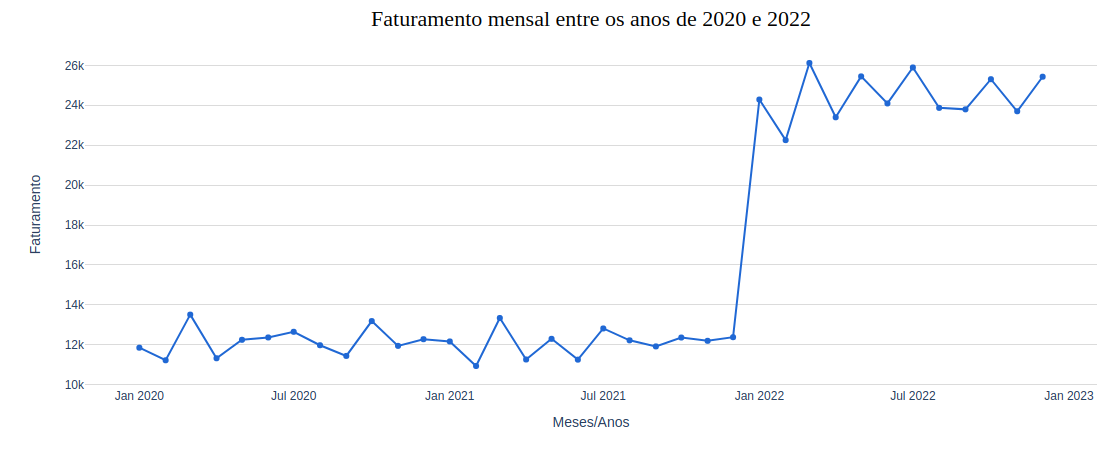

####Tabela com informações detalhadas do faturamento geral

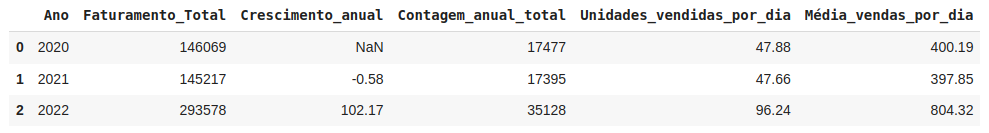


#### Tabela com faturamento e projeção de 2023

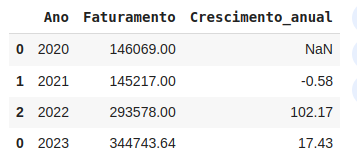

###Seguimentação entre delivery e consumo no local.

Analisamos os dados de faturamento tanto para consumo via delivery quanto para consumo no local. Observamos que ambos os canais apresentaram faturamentos semelhantes.

Para o delivery, os números foram os seguintes:

2020: 73.054

2021: 72.596

2022: 145.443

No consumo no local, os faturamentos foram:

2020: 73.015

2021: 72.621

2022: 148.135

#### Tabela com informações de faturamento por modo de consumo

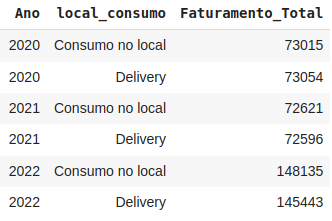

#### Gráfico temporal com os valores de modo de consumo

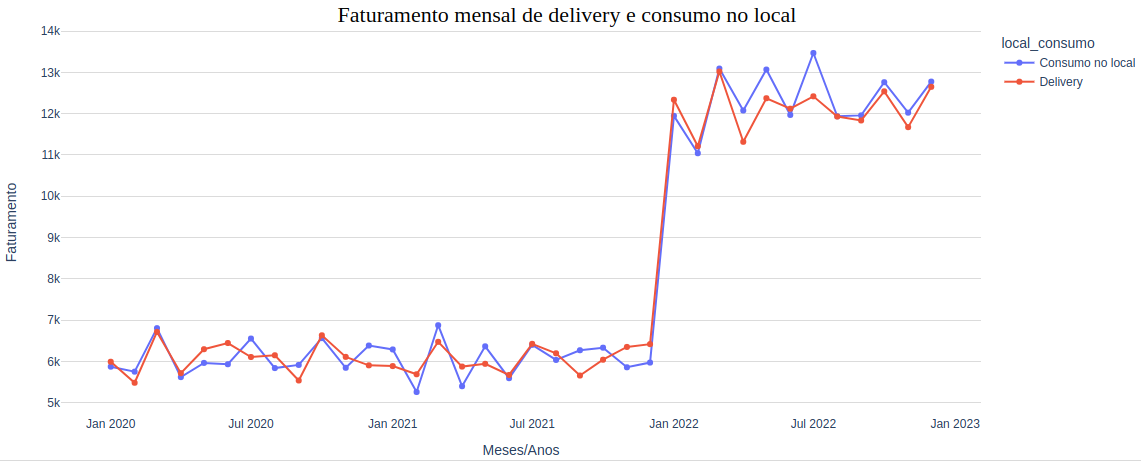

###Faturamento por forma de pagamento!

Analisando os dados, constatamos que o maior faturamento é obtido por meio de pagamentos com cartão de crédito, enquanto o menor faturamento ocorre com pagamentos via Pix.

####Gráfico por forma de pagamentos

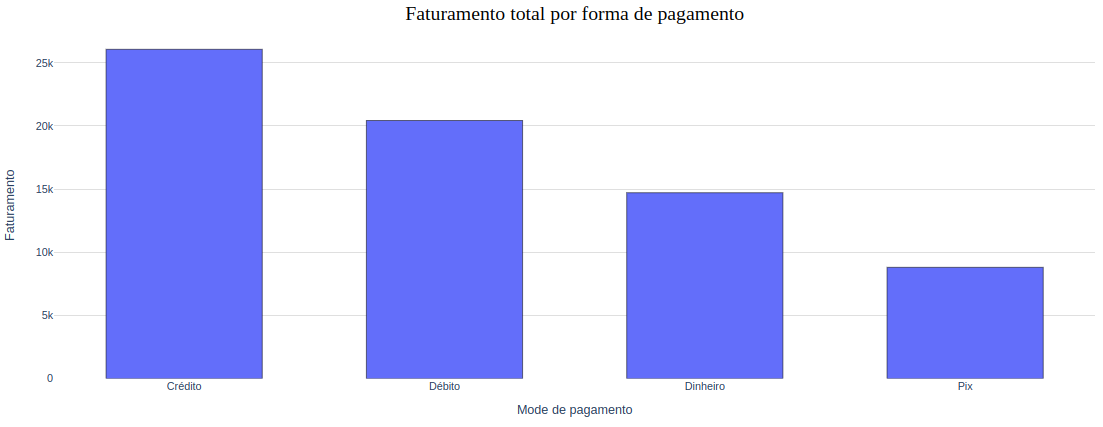

###Faturamento por dia de semana

Ao somar o faturamento segmentado por dias da semana, verificamos que há uma variação leve no faturamento.

####Tabela com informações do faturamento por dia da semana


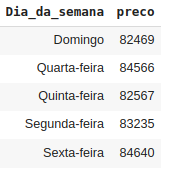

####Gráfico de faturamento por dia da semana

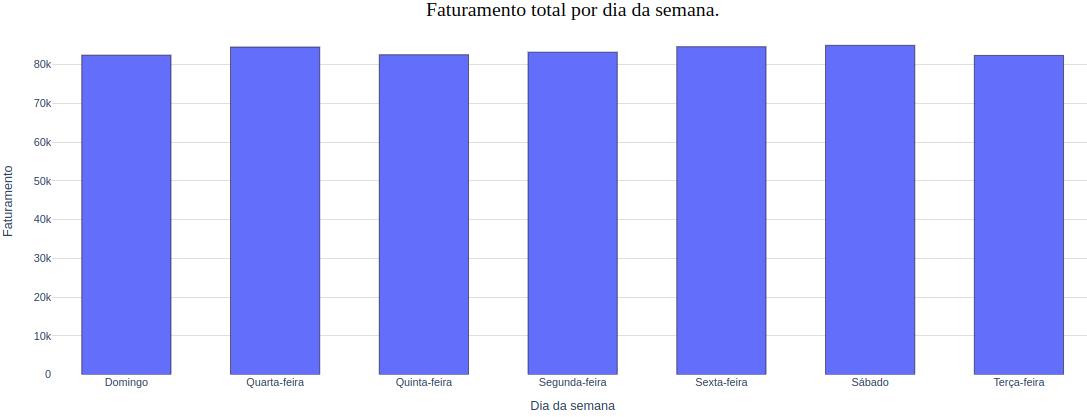

##Análise da filial de Florianópolis



Em 2020, o faturamento foi de 16.225,00, com uma média diária de vendas de R$ 44,45. Em 2021, o faturamento aumentou para 22.033,00. Embora tenha havido um decréscimo de -0,58% no faturamento geral das filiais, a filial de Florianópolis destacou-se com um aumento de 35,80%, alcançando uma média diária de vendas de 60,36. Em 2022, essa filial obteve um impressionante crescimento de 221,91%, com um faturamento total de 70.927,00, tornando-se a filial com o maior crescimento. A média diária de vendas nessa filial foi de 194,32. Para 2023, projetamos um crescimento de 58,53%, com um faturamento estimado de 112.441,60.

###Tabela com informações da Filial

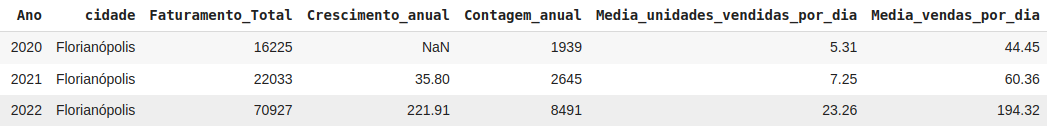


###Tabela com o faturamento anual dos anos de 2020 até 2022 com a projeção de 2023

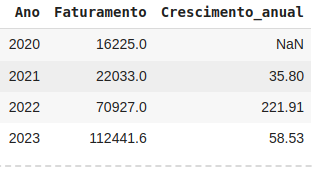

###Gráfico de faturamento mensal de 2020 até 2022 com projeção do ano de 2023

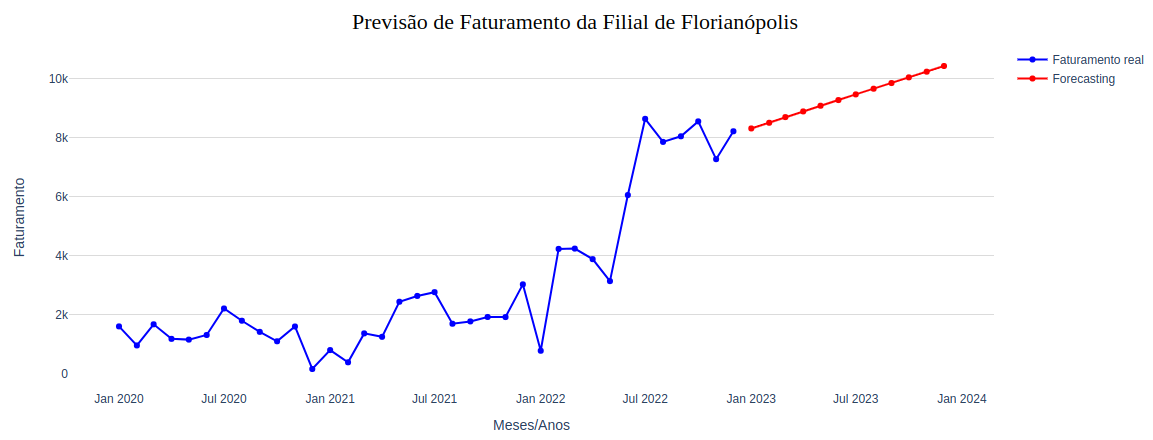

##Análise e projeção filial de São Paulo

Em 2020, o faturamento foi de 25.273,00, com uma média diária de vendas de R$ 69,24. Em 2021, o faturamento aumentou para 25.584,00, representando um crescimento modesto de 1,23%, com uma média diária de vendas de 70,09. Em 2022, observou-se um crescimento significativo de 100,64%, resultando em um faturamento total de 51.332,00 e uma média diária de vendas de 194,32. Para 2023, projetamos um crescimento adicional de 8,26%, com um faturamento estimado de 55.574,09.

###Tabela com informações da filial



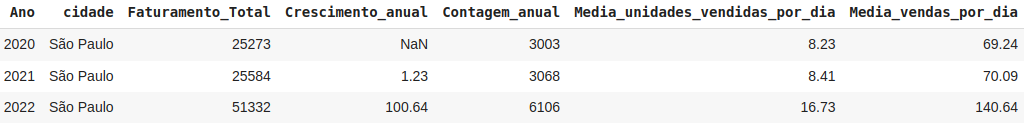

###Tabela com o faturamento anual dos anos de 2020 até 2022 com a projeção de 2023

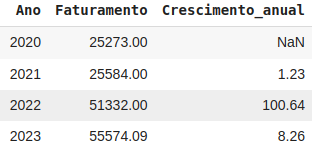

###Gráfico de faturamento mensal de 2020 até 2022 com projeção do ano de 2023

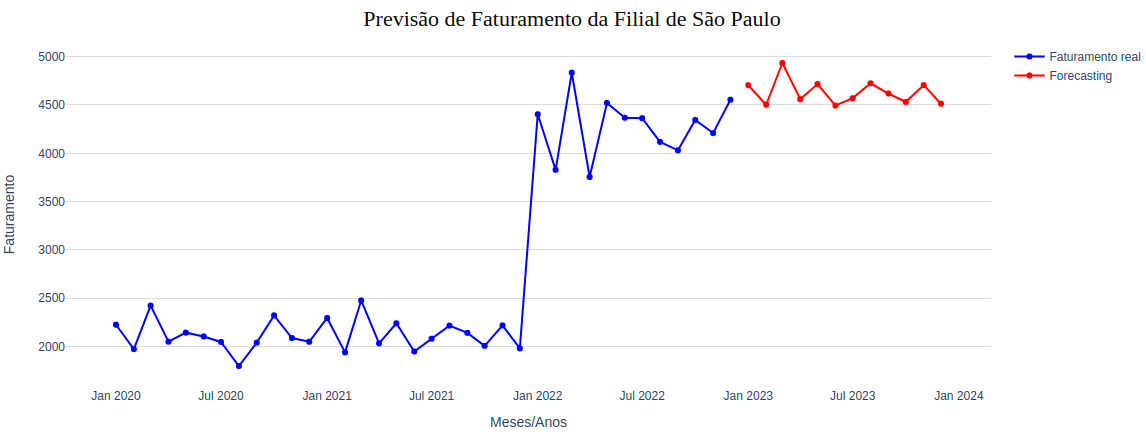

##Análise e projeção filial de Santos

Em 2020, o faturamento foi de 36.772,00, com uma média diária de vendas de   100,75. Em 2021, o faturamento caiu para 29.367,00, refletindo uma redução de -20,14%, e a média diária de vendas foi de 80,46. No entanto, em 2022, a filial apresentou uma recuperação significativa, com um crescimento de 57,46%, totalizando um faturamento de 46.240,00 e uma média diária de vendas de 126,68. Para 2023, projetamos um crescimento modesto de 2,70%, com um faturamento estimado de 47.488,81.

###Tabela com informações da Filial

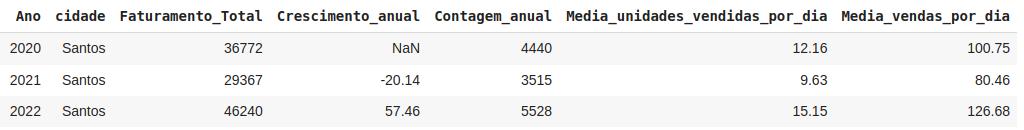

###Tabela com o faturamento anual dos anos de 2020 até 2022 com a projeção de 2023


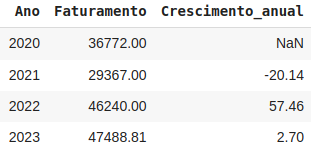

###Gráfico de faturamento mensal de 2020 até 2022 com projeção do ano de 2023

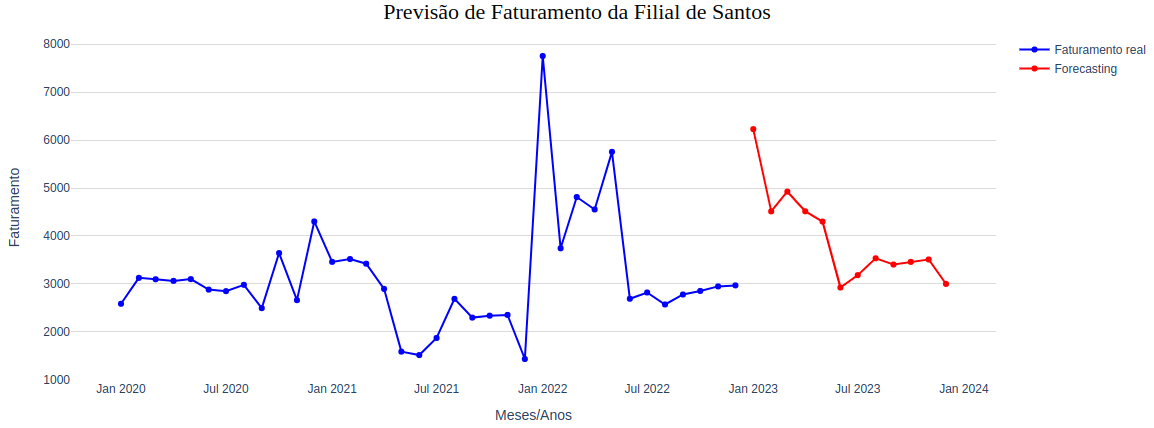

##Análise e projeção da filial de Niterói

Em 2020, o faturamento foi de 16.936,00, com uma média diária de vendas de  
46,40. Em 2021, o faturamento aumentou para 17.685,00, representando um crescimento modesto de 4,42%, com uma média diária de vendas de 48,45. Em 2022, a filial registrou um impressionante crescimento de 97,74%, alcançando um faturamento total de 34.971,00 e uma média diária de vendas de 95,81. Para 2023, projetamos um crescimento de 43,65%, com um faturamento estimado de
50.235,00.

###Tabela com informações da Filial

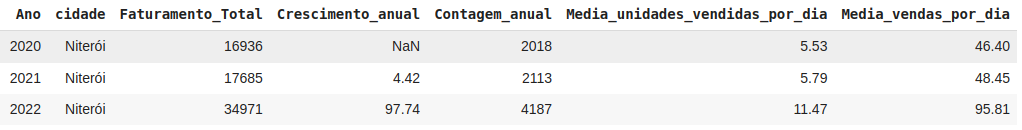

###Tabela com o faturamento anual dos anos de 2020 até 2022 com a projeção de 2023

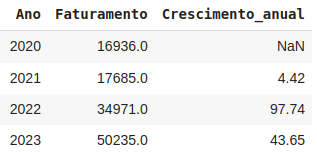

###Gráfico de faturamento mensal de 2020 até 2022 com projeção do ano de 2023

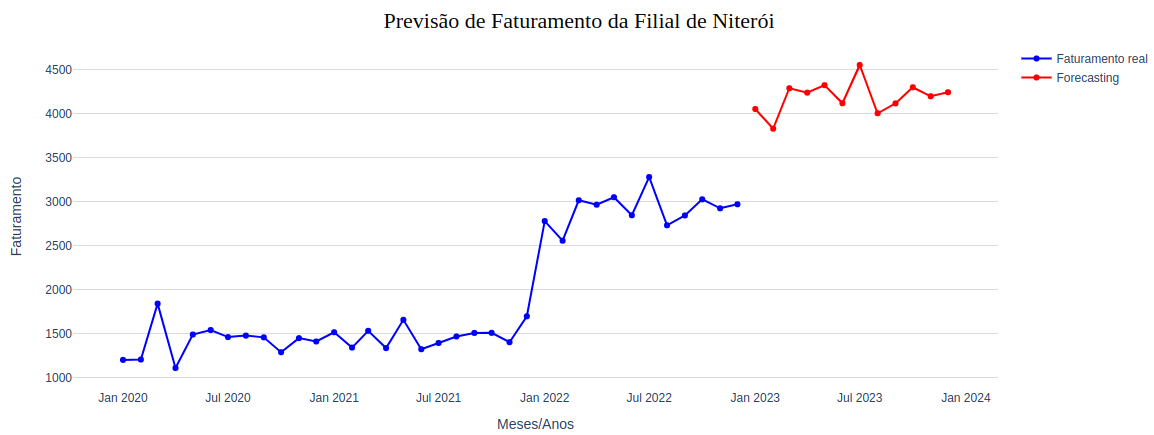

##Análise e projeção da filial de Rio de Janeiro

Em 2020, o faturamento foi de 24.583,00, com uma média diária de vendas de  67,35. Em 2021, o faturamento aumentou para 25.488,00, representando um crescimento de 3,68%, e a média diária de vendas subiu para 69,83. Em 2022, a filial experimentou um crescimento significativo de 104,89%, alcançando um faturamento total de 38.286,00 e uma média diária de vendas de 104,89. Para 2023, projetamos um decréscimo de -37,97%, com um faturamento estimado de  
28.684,19.

###Tabela com informações da Filial

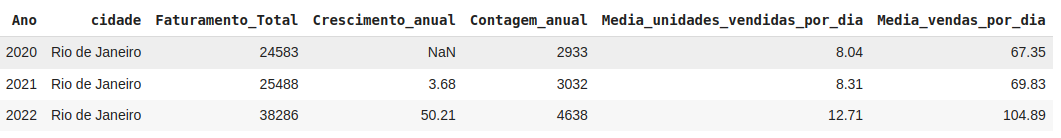

###Tabela com o faturamento anual dos anos de 2020 até 2022 com a projeção de 2023

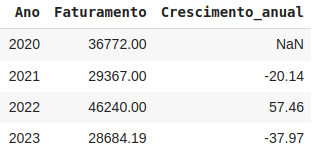

###Gráfico de faturamento mensal de 2020 até 2022 com projeção do ano de 2023

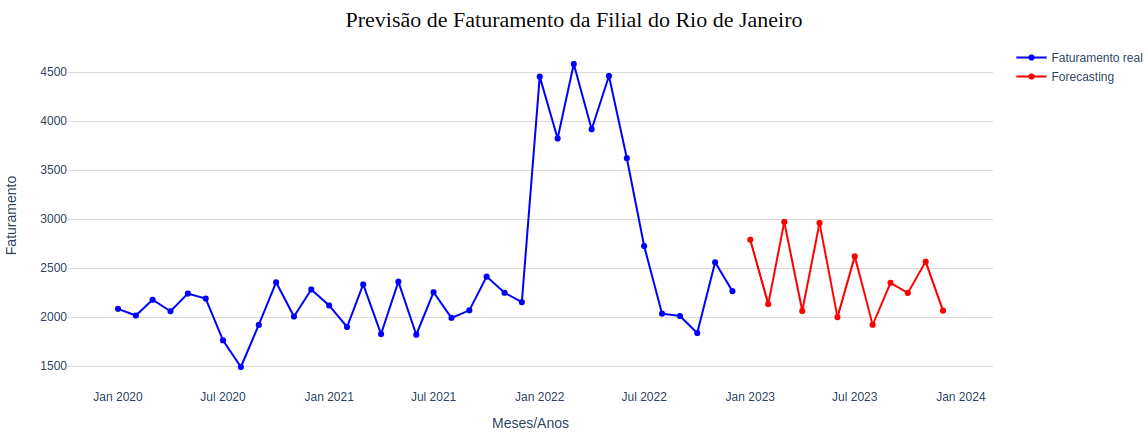

##Análise e projeção da filial de Fortaleza




Em 2020, o faturamento foi de 26.280,00, com uma média diária de vendas de
72,00. Em 2021, o faturamento caiu para 25.060,00, refletindo um leve decréscimo de -4,64%, e a média diária de vendas diminuiu para 68,66. Em 2022, a filial experimentou um impressionante crescimento de 106,79%, alcançando um faturamento total de 51.822,00 e uma média diária de vendas de 141,98. Para 2023, projetamos um pequeno decréscimo de -2,90%, com um faturamento estimado de 50.319,95.

###Tabela com informações da Filial

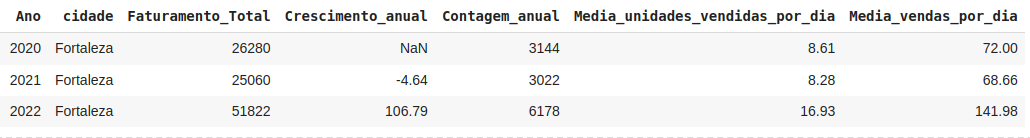

###Tabela com o faturamento anual dos anos de 2020 até 2022 com a projeção de 2023

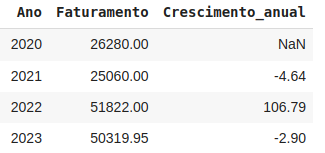

###Gráfico de faturamento mensal de 2020 até 2022 com projeção do ano de 2023

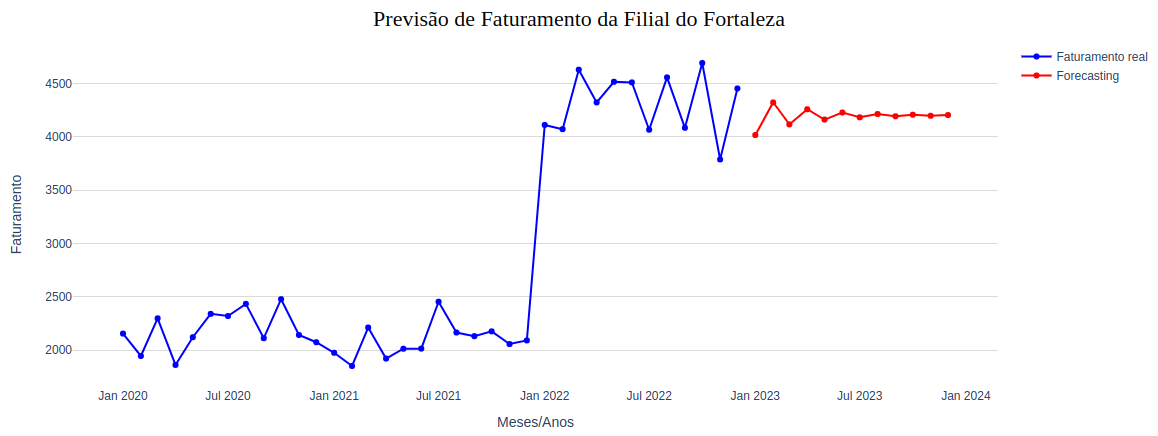